# 可视化探索数据集

同济子豪兄 2023-1-31 6-11

## 进入MMSegmentation主目录

In [1]:
import os
os.chdir('../mmsegmentation')

In [2]:
os.getcwd()

'/mnt/openmmlab-Camp/04-mmsegmentation-tutorial/mmsegmentation'

## 导入工具包

In [3]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 查看单张图像及其语义分割标注

In [4]:
# 指定单张图像路径
img_path = 'Dubai-dataset/img_dir/train/14.jpg'
mask_path = 'Dubai-dataset/ann_dir/train/14.png'

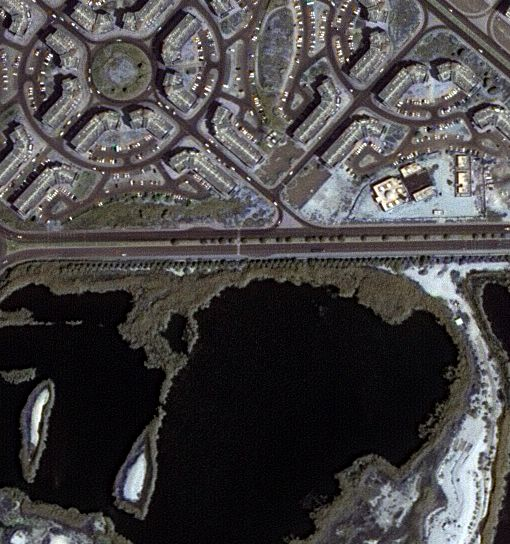

In [5]:
Image.open(img_path)

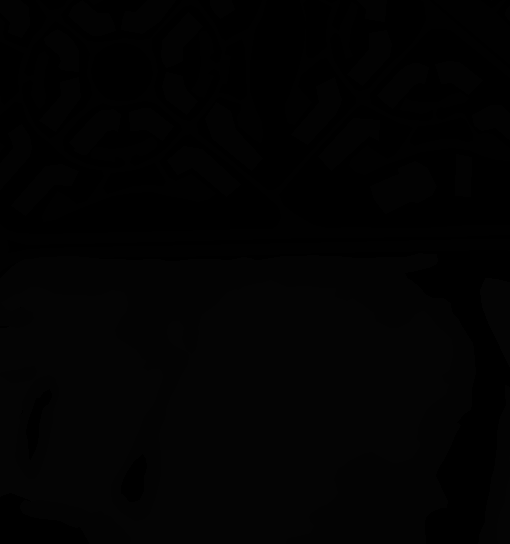

In [6]:
Image.open(mask_path)

In [7]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [8]:
img.shape

(544, 510, 3)

In [9]:
mask.shape

(544, 510, 3)

## mask灰度图标注含义

In [10]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1, 2, 3, 4], dtype=uint8)

| 类别编号 | 类别名称   |
| -------- | ---------- |
| 0        | Land       |
| 1        | Road       |
| 2        | Building   |
| 3        | Vegetation |
| 4        | Water      |
| 5        | Unlabeled  |

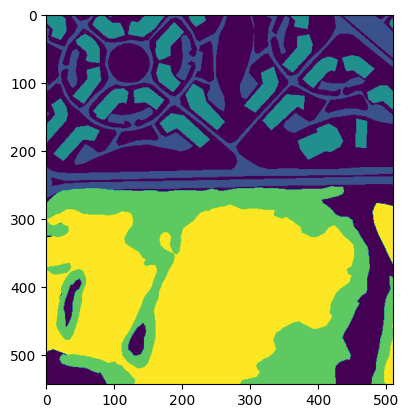

In [11]:
# 可视化语义分割标注
plt.imshow(mask[:,:,0])
plt.show()

## 叠加在原图上显示

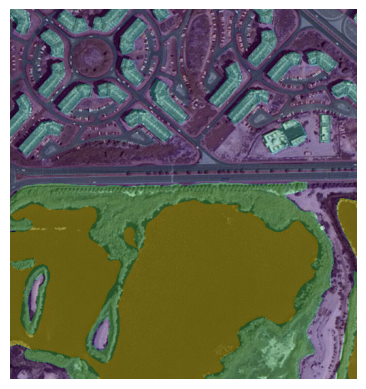

In [12]:
plt.imshow(img[:,:,::-1])
plt.imshow(mask[:,:,0], alpha=0.4) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.show()

## 批量可视化图像和标注

In [13]:
# 指定图像和标注路径
PATH_IMAGE = 'Dubai-dataset/img_dir/train'
PATH_MASKS = 'Dubai-dataset/ann_dir/train'

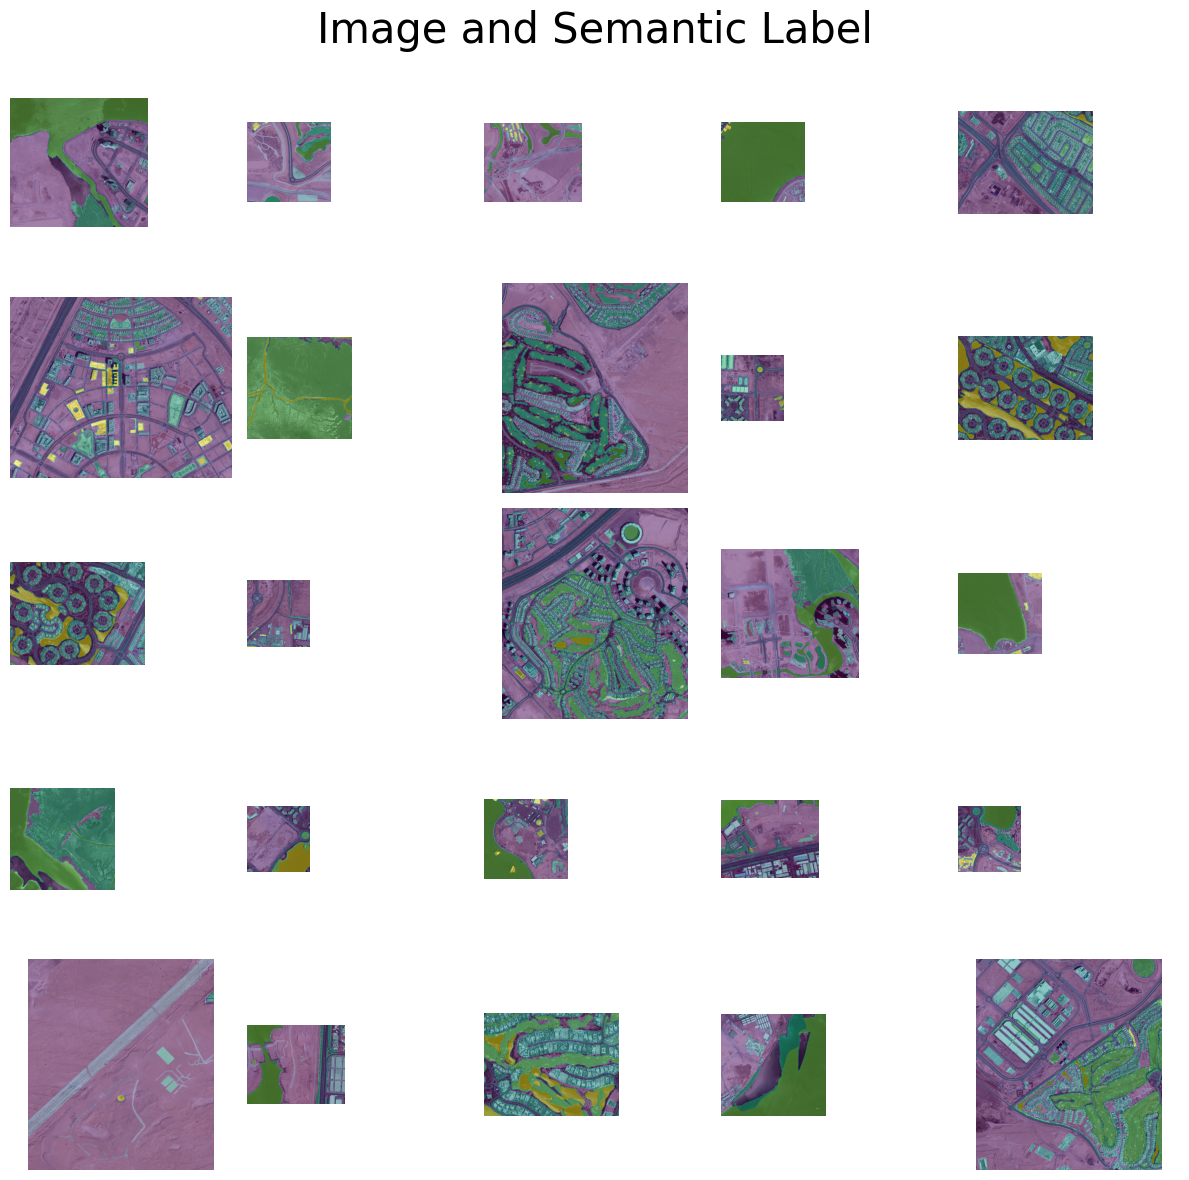

In [14]:
# n行n列可视化
n = 5

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask[:,:,0], alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()